In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

salary = pd.read_csv("C:/Users/Vinny/Desktop/Vinny/School/Team-Anova-Project/Vinny_WIP/salary_data_states.csv")

salary.head()

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,...,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,...,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,...,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,...,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,...,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


## What states (of those I am willing to move to) have the highest paying data-related salaries?

In [2]:
relevant_states = ['California', 'New York', 'Georgia', 'Maine', 'New Hampshire','New Jersey', 
                   'Virginia', 'Oregon', 'Hawaii', 'Pennsylvania','Puerto Rico', 'Vermont', 
                   'Maryland', 'Illinois', 'Texas','Washington']

# get the averages pf the data analyst and data scientist salaries together
datasal = salary.loc[salary['JOB_TITLE_SUBGROUP'].isin(['data analyst', 'data scientist'])]

#filter out the irrelevant states
datasal_fil = datasal[datasal['WORK_STATE'].isin(relevant_states)]

top_states = datasal_fil.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean().round(2).sort_values(ascending=False).reset_index()

top_states.columns =  ['State', 'Average Salary']

print(top_states)

            State  Average Salary
0      California        99190.31
1      Washington        96887.08
2        New York        81722.32
3   New Hampshire        75943.25
4          Oregon        75016.47
5           Maine        72595.25
6         Georgia        72325.67
7      New Jersey        70514.90
8        Maryland        69127.53
9        Virginia        68407.99
10          Texas        67483.28
11       Illinois        66909.28
12         Hawaii        66240.33
13   Pennsylvania        66120.19
14    Puerto Rico        45000.00
15        Vermont        42000.00


## What are the differences between job sub-categories?

In [3]:
salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].mean().round(2)


JOB_TITLE_SUBGROUP
assistant professor       94876.71
attorney                 146413.60
business analyst          71300.08
data analyst              70030.08
data scientist           108021.04
management consultant    108251.33
software engineer         92505.30
teacher                   46039.99
Name: PAID_WAGE_PER_YEAR, dtype: float64

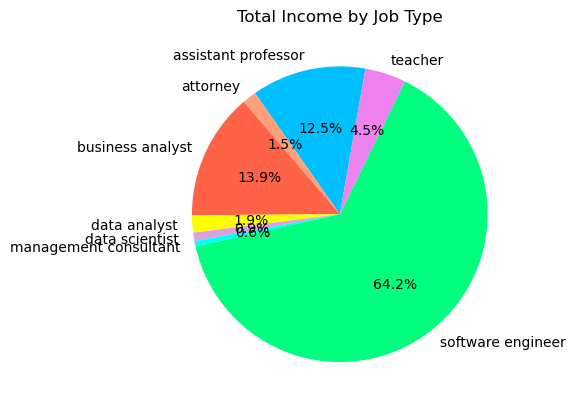

In [4]:
colors = ['deepskyblue','lightsalmon', 'tomato', 'yellow', 'plum', 'aqua', 'springgreen', 'violet']

salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=80, colors=colors)
plt.title('Total Income by Job Type')
plt.ylabel('')
plt.show()

## Which companies have the highest salaries for those sub-types?

##### Data Scientist

In [5]:
sciensal = salary.loc[salary['JOB_TITLE_SUBGROUP']=='data scientist']

sciensal2 = sciensal.copy()

sciensal2['EMPLOYER_NAME'] = sciensal2['EMPLOYER_NAME'].replace({'360I, LLC': '360I LLC'})

data_scientist = sciensal2.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].mean().head(5).round(2).sort_values(ascending=False)

print(data_scientist)

EMPLOYER_NAME
1618LABS, INC.    125000.0
4INFO, INC.       100000.0
23ANDME, INC.      90000.0
360I LLC           73500.0
1901 GROUP LLC     60940.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


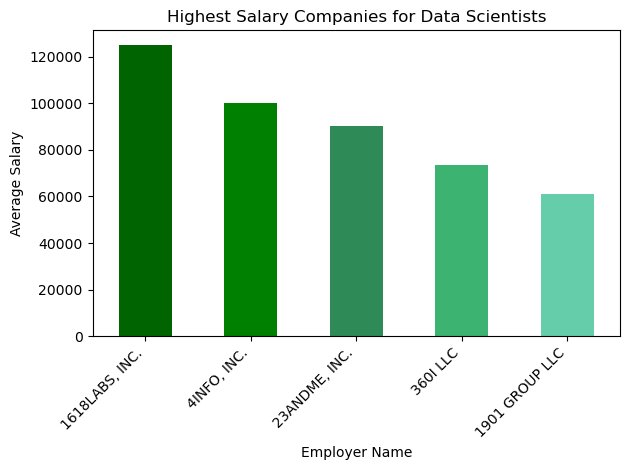

In [6]:
colors = ['darkgreen','green','seagreen','mediumseagreen','mediumaquamarine']
data_scientist.plot(kind='bar', color=colors)
plt.title('Highest Salary Companies for Data Scientists')
plt.xlabel('Employer Name')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### Data Analyst

In [7]:
anasal = salary.loc[salary['JOB_TITLE_SUBGROUP']=='data analyst']

data_analyst = anasal.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].mean().head(5).round(2).sort_values(ascending=False)
print(data_analyst)

EMPLOYER_NAME
3S BUSINESS CORPORATION                82000.0
3CSI LLC                               72000.0
4C INSIGHTS, INC.                      64522.0
5TH STREET INVESTMENT COMPANY, LLC.    47652.8
11 MAIN, INC.                          43316.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


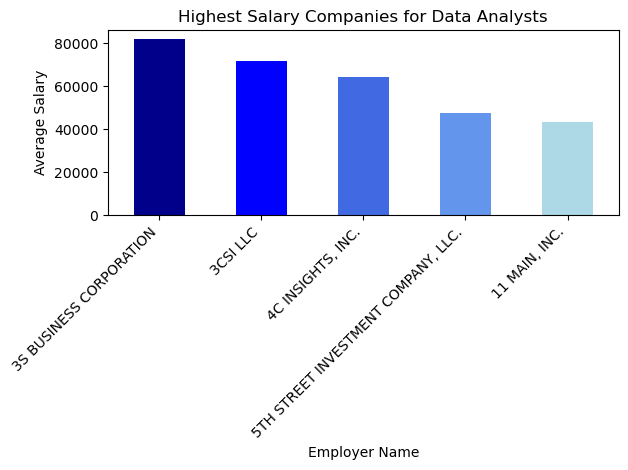

In [8]:
colors = ['darkblue','blue','royalblue','cornflowerblue','lightblue']
data_analyst.plot(kind='bar', color=colors)
plt.title('Highest Salary Companies for Data Analysts')
plt.xlabel('Employer Name')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Attorney

In [9]:
attsal = salary.loc[salary['JOB_TITLE_SUBGROUP']=='attorney']

attsal2 = attsal.copy()

attsal2['EMPLOYER_NAME'] = attsal2['EMPLOYER_NAME'].replace({'81DOCCOM INC.': '81DOC.COM INC.'})

attorney = attsal2.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].mean().head(5).round(2).sort_values(ascending=False)

print(attorney)

EMPLOYER_NAME
ACKER MERRALL & CONDIT COMPANY              124800.0
ADDUCI, MASTRIANI & SCHAUMBERG, LLP         108000.0
1199 SEIU UNITED HEALTHCARE WORKERS EAST    106089.0
ABRAHAM, FRUCHTER & TWERSKY LLP              82472.0
81DOC.COM INC.                               68640.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


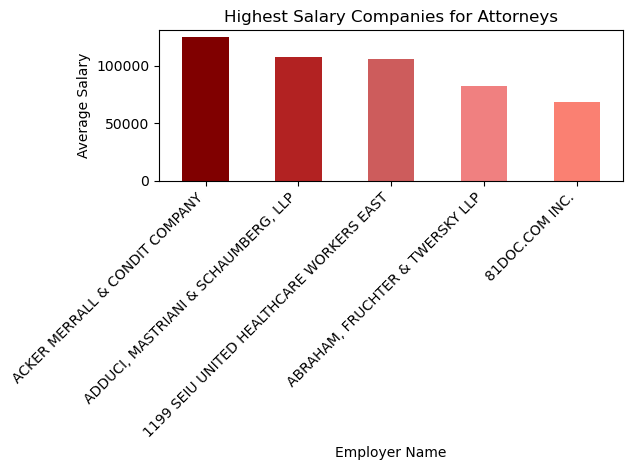

In [10]:
colors = ['maroon','firebrick','indianred','lightcoral','salmon']
attorney.plot(kind='bar', color=colors)
plt.title('Highest Salary Companies for Attorneys')
plt.xlabel('Employer Name')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Will the answer change if I take standard of living into account?

In [11]:
# Cost of Living sourced from https://meric.mo.gov/data/cost-living-data-series

col_dict = {
    'California': 136.4,
    'New York': 126.5,
    'Georgia': 90.9,
    'Maine': 110.7,
    'New Hampshire': 115.6,
    'New Jersey': 110.3,
    'Virginia': 101.4,
    'Oregon': 114.7,
    'Hawaii': 179.2,
    'Pennsylvania': 94.8,
    'Puerto Rico': None,
    'Vermont': 114.9,
    'Maryland': 114.8,
    'Illinois': 91.8,
    'Texas': 93.0,
    'Washington': 115.7}


top_states = pd.merge(top_states, pd.DataFrame(list(col_dict.items()), columns=['State', 'Cost of Living Index']), on='State', how='left')


In [12]:
top_states['COL Ratio'] = (top_states['Average Salary']/top_states['Cost of Living Index']).round(2)

top_states.sort_values(by='COL Ratio',ascending=False)

#higher is better

,State,Average Salary,Cost of Living Index,COL Ratio
1,Washington,96887.08,115.7,837.40
6,Georgia,72325.67,90.9,795.66
11,Illinois,66909.28,91.8,728.86
0,California,99190.31,136.4,727.20
10,Texas,67483.28,93.0,725.63
13,Pennsylvania,66120.19,94.8,697.47
9,Virginia,68407.99,101.4,674.64
3,New Hampshire,75943.25,115.6,656.95
5,Maine,72595.25,110.7,655.78
4,Oregon,75016.47,114.7,654.02


From this output it appears that the most worth it state to live in if you work a data job, is in Washington, since it has the highest Cost of Living to Average Salary Ratio. This makes me feel more comfortable living in California, as Data Analysts and Scientists don't seem to be as appreciated financially elsewhere in the country.

